In [1]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality     # Access to example data provided with fastai

In [2]:
plt.style.use(['dark_background'])

# Tabular example

Tabular data should be in a Pandas `DataFrame`.

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [4]:
dep_var = '>=50k'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [5]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [6]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test, label=0)
                           .databunch())

In [7]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,-0.6294,1.0806,-0.4224
Private,HS-grad,Divorced,Craft-repair,Not-in-family,White,False,-0.2629,-0.9686,-0.4224
Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,False,-0.1163,0.9131,-0.4224
Private,HS-grad,Divorced,Handlers-cleaners,Unmarried,Black,False,0.2502,2.0239,-0.4224
Federal-gov,HS-grad,Divorced,Tech-support,Unmarried,White,False,1.0564,-0.0344,-0.4224
?,12th,Never-married,?,Own-child,Black,False,-1.4357,-0.4658,-0.8135
Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,False,-0.0430,-1.2478,1.1422
State-gov,HS-grad,Never-married,Other-service,Unmarried,Black,False,-0.0430,-0.3817,-0.4224
Private,HS-grad,Divorced,Other-service,Unmarried,White,False,0.3968,-0.6503,-0.4224
Private,Bachelors,Never-married,Prof-specialty,Own-child,White,False,-1.1425,-0.6086,1.1422


In [10]:
learn = get_tabular_learner(data, layers=[200,100], metrics=accuracy, callback_fns=ShowGraph)

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


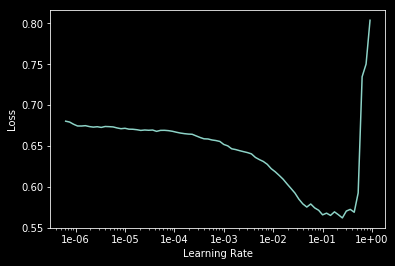

In [12]:
learn.recorder.plot()

Total time: 00:44
epoch  train_loss  valid_loss  accuracy
1      0.357999    0.394789    0.795000  (00:04)
2      0.380535    0.382437    0.810000  (00:04)
3      0.360853    0.373960    0.835000  (00:04)
4      0.357192    0.366476    0.830000  (00:04)
5      0.359364    0.366561    0.840000  (00:04)
6      0.357299    0.365034    0.820000  (00:04)
7      0.359756    0.359413    0.820000  (00:04)
8      0.348539    0.353675    0.840000  (00:04)
9      0.340181    0.353960    0.845000  (00:04)
10     0.358333    0.353130    0.845000  (00:04)



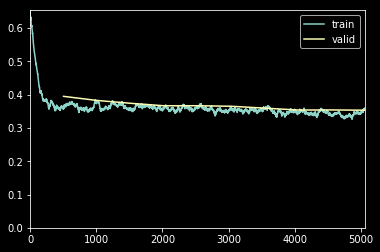

In [13]:
learn.fit_one_cycle(10, 1e-2)

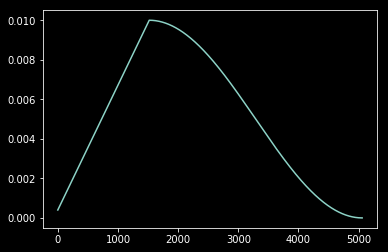

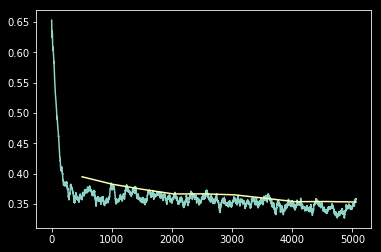

In [15]:
learn.recorder.plot_lr()
learn.recorder.plot_losses()

In [16]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>=50k
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,1
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,1
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,0
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,1
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,0


In [17]:
row = df.iloc[4]

In [18]:
learn.predict(row)

(0, tensor(1), tensor([0.1064, 0.8936]))